In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functs import functs


In [3]:
raw = pd.read_csv("../../bullshit_data/MCSFT_net.txt")
raw

,Date,Net_value(Millions of US $)
0,2022-06-30,16.740
1,2022-03-31,16.728
2,2021-12-31,18.765
3,2021-09-30,20.505
4,2021-06-30,16.458
5,2021-03-31,15.457
6,2020-12-31,15.463
7,2020-09-30,13.893
8,2020-06-30,11.202
9,2020-03-31,10.752


In [4]:
raw['Date'] = pd.to_datetime(raw['Date'])
raw = raw.set_index('Date')
raw.columns = ['net_value']

In [22]:

print('--------------------------------------------------------')
print('Data Info')
print('--------------------------------------------------------')
print(raw.info())
print()
print()

print('--------------------------------------------------------')
print('Data Description')
print('--------------------------------------------------------')
print(raw.describe().T)
print()
print()

--------------------------------------------------------
Data Info
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2022-06-30 to 2009-03-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   net_value  54 non-null     float64
dtypes: float64(1)
memory usage: 864.0 bytes
None


--------------------------------------------------------
Data Description
--------------------------------------------------------
           count      mean       std    min   25%    50%      75%     max
net_value   54.0  7.429056  5.074797 -6.302  4.97  6.161  8.86075  20.505




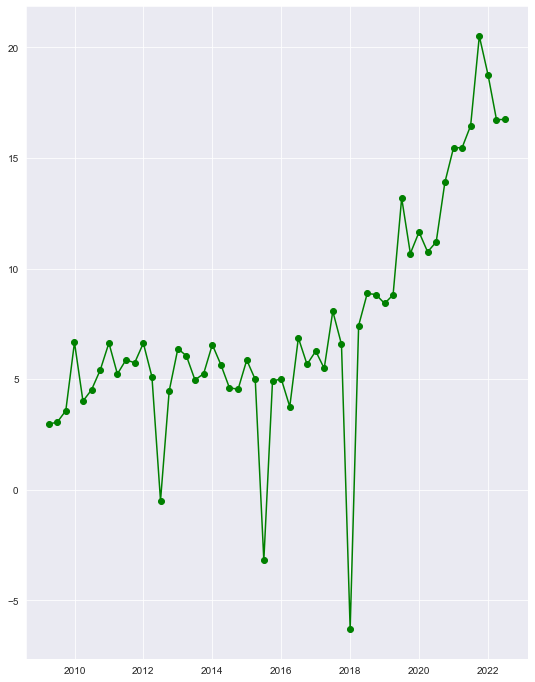

In [5]:
figure = plt.figure(figsize=(9, 12))
plt.plot(raw, '-o', c='g')
plt.show()

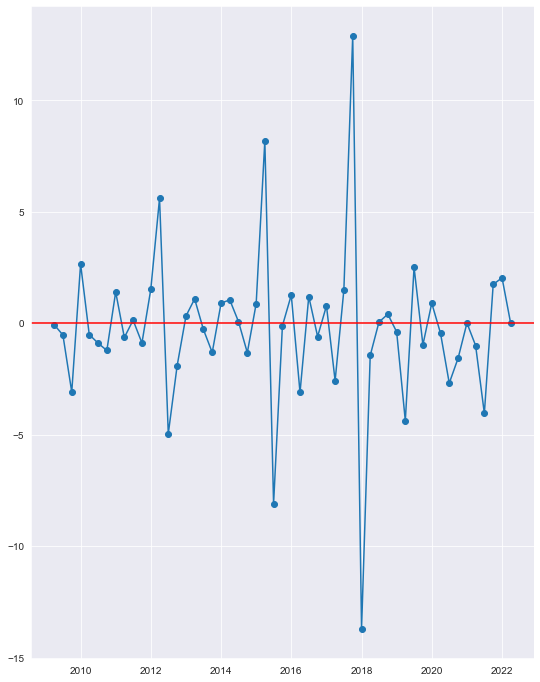

In [13]:
data = raw.diff(1).dropna()
figure = plt.figure(figsize=(9, 12))
_ = plt.plot(data, '-o')
_ = plt.axhline(y=0, c='r')

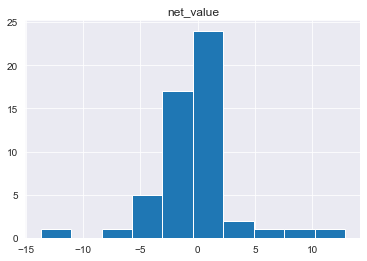

In [18]:
h = data.hist()

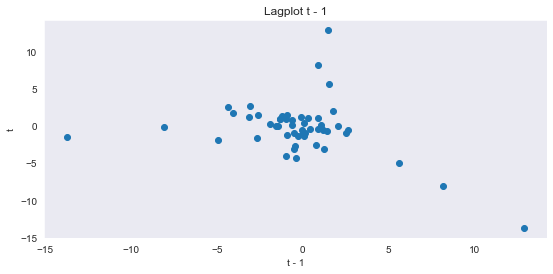

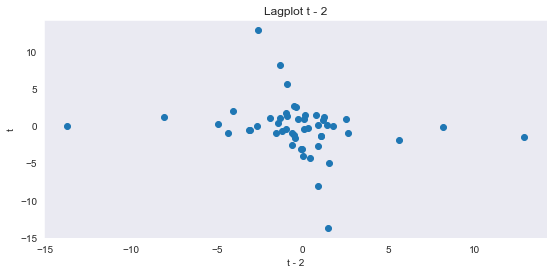

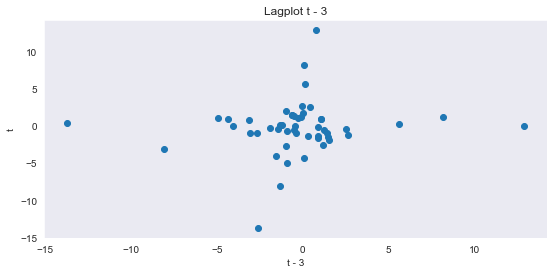

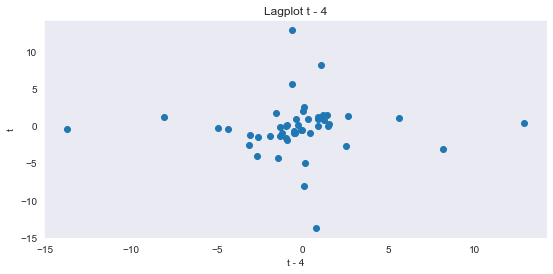

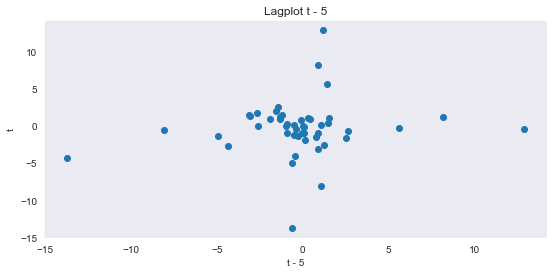

In [20]:
functs.lag_plot(data, 5)

Badanie sezonowości
****

C:\Users\kmate\AppData\Local\Temp\ipykernel_18180\2999532225.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_1 = data.loc['2016-01-01':'2017-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_18180\2999532225.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_2 = data.loc['2017-01-01':'2018-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_18180\2999532225.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_3 = data.loc['2018-01-01':'2019-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_18180\2999532225.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and wil

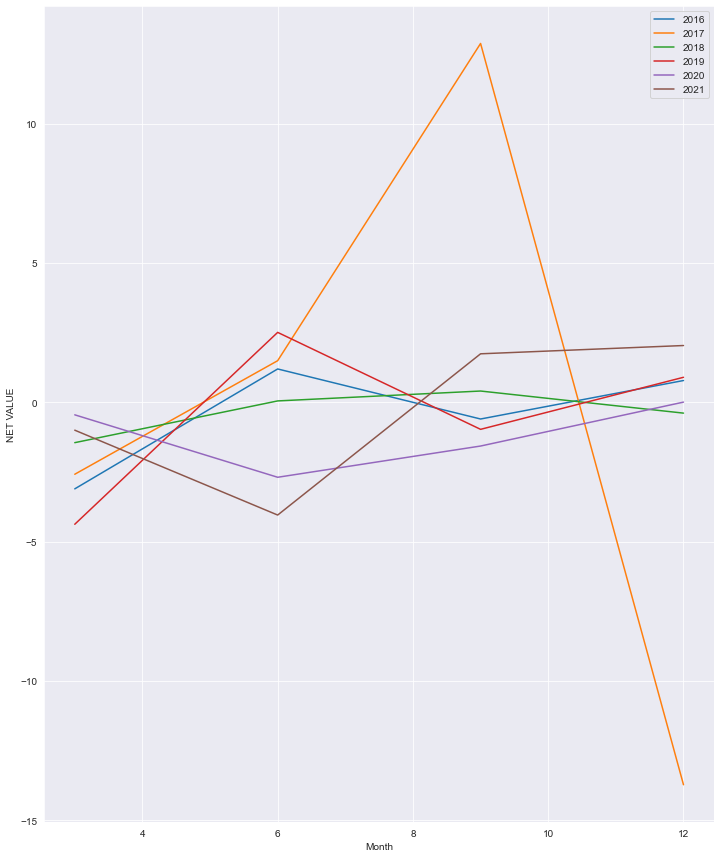

In [39]:
years = ['2016', '2017', '2018', '2019', '2020', '2021']

seasons = []
s_1 = data.loc['2016-01-01':'2017-01-01']
s_2 = data.loc['2017-01-01':'2018-01-01']
s_3 = data.loc['2018-01-01':'2019-01-01']
s_4 = data.loc['2019-01-01':'2020-01-01']
s_5 = data.loc['2020-01-01':'2021-01-01']
s_6 = data.loc['2021-01-01':'2021-12-31']
s_7 = data.loc['2022-01-01':]

seasons.append(s_1)
seasons.append(s_2)
seasons.append(s_3)
seasons.append(s_4)
seasons.append(s_5)
seasons.append(s_6)
seasons.append(s_7)

figure = plt.figure(figsize=(12, 15))
for season in seasons:
    plt.plot(season.index.month, season.net_value)
    plt.xlabel('Month')
    plt.ylabel('NET VALUE')
plt.legend([year for year in years])
plt.show()

Badanie stacjonarności szeregu
*****

In [14]:

print(sm.tsa.stattools.kpss(data))
print()
print(sm.tsa.stattools.adfuller(data))

(0.21923055505453953, 0.1, 20, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

(-6.6470311191469715, 5.234160409720593e-09, 2, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 218.4735918087809)


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<Figure size 648x864 with 0 Axes>

Badanie autokorelacji
*****


Figure(432x288)


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 648x864 with 0 Axes>

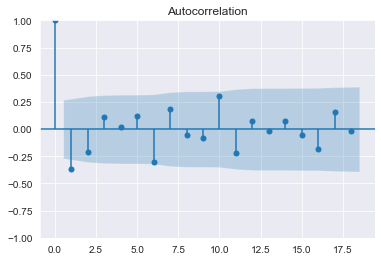

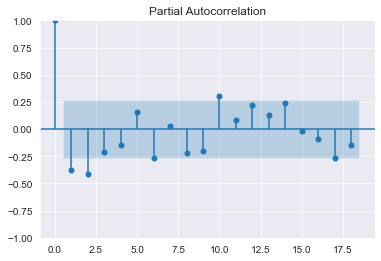

In [16]:

sm.graphics.tsa.plot_acf(data)
print()
print(sm.graphics.tsa.plot_pacf(data))

Model
*****

In [58]:
import pmdarima
auto = pmdarima.auto_arima(data, information_criterion="aicc", stationary=True, max_d=2, m=4, seasonal = True, maxd=2, trace=True)
print(auto.summary())

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AICC=282.634, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AICC=288.457, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AICC=284.630, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AICC=275.510, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AICC=286.581, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AICC=273.531, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AICC=275.486, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[4] intercept   : AICC=inf, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AICC=275.712, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AICC=275.594, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AICC=283.146, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[4] intercept   : AICC=276.310, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[4]             : AICC=274.094, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[4] intercept
Total fit time: 0.590 seconds
                         

273.041


<Figure size 648x864 with 0 Axes>

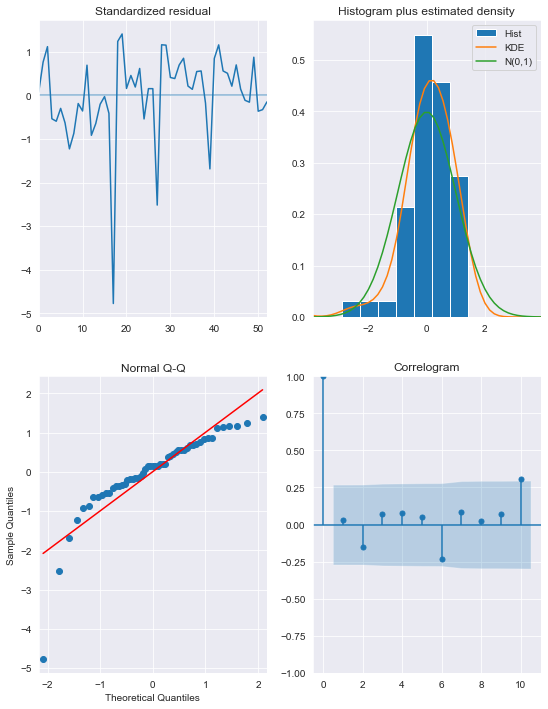

In [59]:
figure = plt.figure(figsize=(9, 12))
_ = auto.plot_diagnostics(figsize=(9,12))
plt.show()

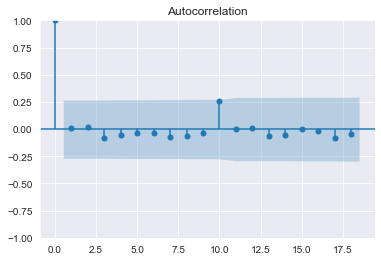

C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


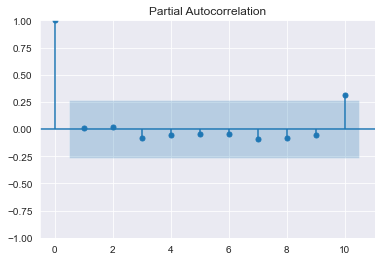

Date
2022-03-31      0.066266
2021-12-31      5.880181
2021-09-30     11.734567
2021-06-30      2.628368
2021-03-31      3.176226
2020-12-31      0.798467
2020-09-30      3.571127
2020-06-30     13.471588
2020-03-31      6.803911
2019-12-31      0.313297
2019-09-30      1.149298
2019-06-30      4.279892
2019-03-31      7.502766
2018-12-31      3.735706
2018-09-30      0.367290
2018-06-30      0.006850
2018-03-31      1.523662
2017-12-31    203.738627
2017-09-30     13.678991
2017-06-30     17.730539
2017-03-31      0.224549
2016-12-31      1.860803
2016-09-30      0.327685
2016-06-30      3.401683
2016-03-31      2.613537
2015-12-31      0.212739
2015-09-30      0.210453
2015-06-30     56.608966
2015-03-31     12.032246
2014-12-31     11.858855
2014-09-30      1.503232
2014-06-30      1.329530
2014-03-31      4.329399
2013-12-31      6.476103
2013-09-30      0.409655
2013-06-30      0.171494
2013-03-31      2.668520
2012-12-31      2.798285
2012-09-30      0.285382
2012-06-30     25.42

In [60]:
resid = auto.resid()
resid = pow(resid, 2)
sm.graphics.tsa.plot_acf(resid)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=10)
plt.show()

print(resid)

Predictions
*****

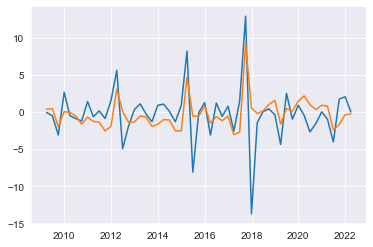

In [67]:
in_sample = auto.predict_in_sample(raw)
pred = in_sample
pred.columns = ['net_value']

real = plt.plot(data, label='real')
pred_ = plt.plot(pred, label='prediction')
plt.show()


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


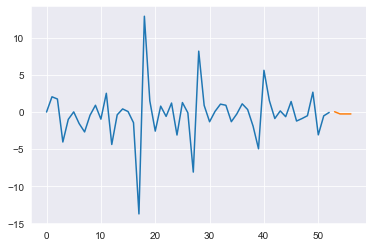

In [65]:
plt.show()
prediction_OS = auto.predict(n_periods=4)
v = plt.plot(data.values, label='real')
b = plt.plot(prediction_OS, label='prediction')
plt.show()